# Create the mandatory plots for Part 3

In [1]:
from lacbox.io import load_pwr, load_ind, load_inds
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from lacbox.io import load_ae
import numpy as np
from Part_2_aero_design_functions import  get_design_functions
import scienceplots
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])
# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

# Import data

In [3]:
# This .ind file contains the data for the design pitch and TSR
BB_ind_file_path = Path.cwd().parent.parent / 'res_hawc2s_backup' / 'BB_redesign_hawc2s_multitsr_u8013.ind'

# Load the data in a dictionary
ind_data = load_ind(BB_ind_file_path)

ae_path = Path.cwd().parent.parent / 'data'  / 'DTU_10MW_RWT_ae.dat'
ae = load_ae(ae_path)
r, chord_list, tc_list, pcset = load_ae(ae_path, unpack=True)

# Interpolate the variables so that we can compare with the design function data
Cl_interpolated = np.interp(r, ind_data["s_m"], ind_data["Cl"])
Cd_interpolated = np.interp(r,ind_data["s_m"], ind_data["Cd"])
aoa_interpolated = np.interp(r,ind_data["s_m"], ind_data["aoa_rad"]) # RAD !!!

FileNotFoundError: c:\Users\Spyros\EWEM\3_Semester\46320_LAC\Assignments\LAC\res_hawc2s_backup\BB_redesign_hawc2s_multitsr_u8013.ind not found.

# Data rearrangement

In [4]:
# Scale ratio of BB blade length/DTU 10 MW blade length
scale_ratio_blade = 1.0388359746215876

ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'

ae = load_ae(ae_path)

# Read new design data
r, c_10mw, tc_10mw, pcset = load_ae(ae_path, unpack=True)

r_blade = r * scale_ratio_blade

cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(2)

# Interpolate in the correct way to make the graphs

# Interpolate for the relative thickness
tc_design = np.loadtxt('tc_BB.txt')
cl_design = cl_des(tc_design)
cd_design = cd_des(tc_design)
aoa_design = aoa_des(tc_design)

FileNotFoundError: tc_BB.txt not found.

# Plotting

# Lift coefficient

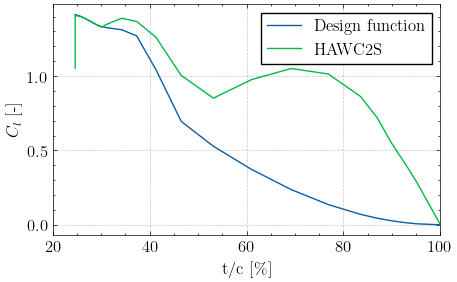

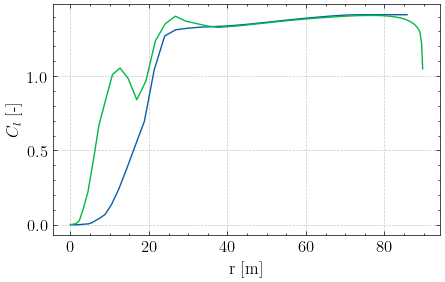

In [5]:
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(tc_design,cl_design,label='Design function')
plt.plot(tc_list,Cl_interpolated,label='HAWC2S')
plt.ylabel(r"$C_l$ [-]")
plt.xlabel(r't/c [\%]')
plt.legend()
plt.xlim([20,100])
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Cl_tc_hawc2s_vs_design.pdf')


plt.figure(figsize=(5, 3))
plt.plot(r[:-1],cl_design, label='Design function')
plt.plot(ind_data["s_m"], ind_data["Cl"],label='HAWC2S')
plt.ylabel(r"$C_l$ [-]")
plt.xlabel(r'r [m]')
# plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Cl_r_hawc2s_vs_design.pdf')


# Lift to drag ratio

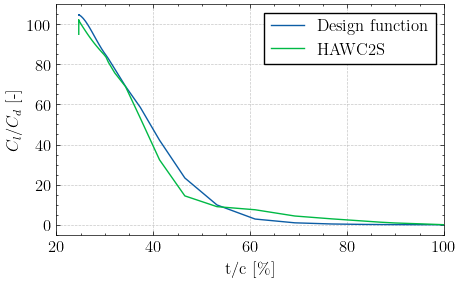

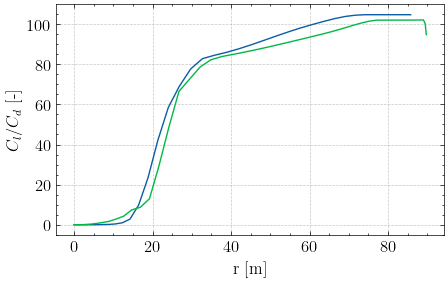

In [6]:
# Calculate the arrays
cl_cd_design = cl_design/cd_design

plt.figure(figsize=(5, 3))
plt.plot(tc_design,cl_cd_design,label='Design function')
plt.plot(tc_list,Cl_interpolated/Cd_interpolated,label='HAWC2S')
plt.ylabel(r"$C_l/C_d$ [-]")
plt.xlabel(r't/c [\%]')
plt.legend()
plt.xlim([20,100])
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Cl_Cd_tc_hawc2s_vs_design.pdf')


plt.figure(figsize=(5, 3))
plt.plot(r[:-1],cl_cd_design, label='Design function')
plt.plot(ind_data["s_m"], ind_data["Cl"]/ind_data["Cd"],label='HAWC2S')
plt.ylabel(r"$C_l/C_d$ [-]")
plt.xlabel(r'r [m]')
# plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Cl_Cd_r_hawc2s_vs_design.pdf')

# Angle of attack

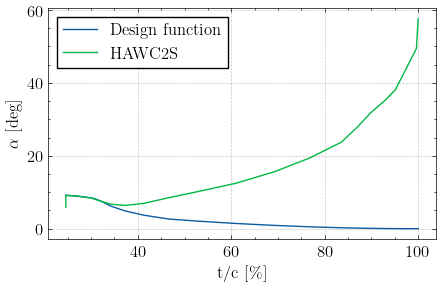

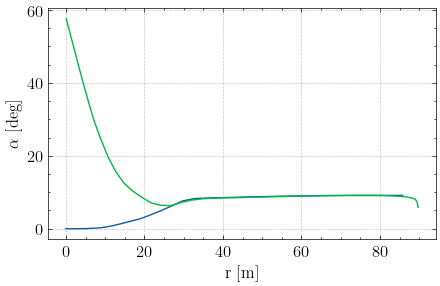

In [7]:
plt.figure(figsize=(5, 3))
plt.plot(tc_design,aoa_design, label='Design function')
plt.plot(tc_list,np.rad2deg(aoa_interpolated),label='HAWC2S')
plt.ylabel(r"$\alpha$ [deg]")
plt.xlabel(r't/c [\%]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/aoa_tc_hawc2s_vs_design.pdf')

plt.figure(figsize=(5, 3))
plt.plot(r[:-1],aoa_design, label='Design function')
plt.plot(ind_data["s_m"], np.rad2deg(ind_data["aoa_rad"]),label='HAWC2S')
plt.ylabel(r"$\alpha$ [deg]")
plt.xlabel(r'r [m]')
# plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/aoa_r_hawc2s_vs_design.pdf')

# HAWC2S plots

Cl,Cl/Cd,aoa,CTloc,CPloc VS radius

In [ ]:
# Lift coefficient
plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], ind_data["Cl"])
plt.ylabel(r"$C_l$ [-]")
plt.xlabel(r'r [m]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Cl_r_hawc2s.pdf')

# Lift to drag ratio
plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], ind_data["Cl"]/ind_data["Cd"])
plt.ylabel(r"$C_l/C_d$ [-]")
plt.xlabel(r'r [m]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Cl_Cd_r_hawc2s.pdf')

# Angle of attack
plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], np.rad2deg(ind_data["aoa_rad"]))
plt.ylabel(r"$\alpha$ [deg]")
plt.xlabel(r'r [m]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/aoa_r_hawc2s.pdf')

# Axial induction
plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], ind_data["a"])
plt.ylabel(r"a [-]")
plt.xlabel(r'r [m]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/induction_r_hawc2s.pdf')

# local CT
plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], ind_data["CT"])
plt.ylabel(r"$C_{T,local}$ [-]")
plt.xlabel(r'r [m]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/CTlocal_r_hawc2s.pdf')

# local CP
plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], ind_data["CP"])
plt.ylabel(r"$C_{P,local}$ [-]")
plt.xlabel(r'r [m]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/CPlocal_r_hawc2s.pdf')

# Jim extra points

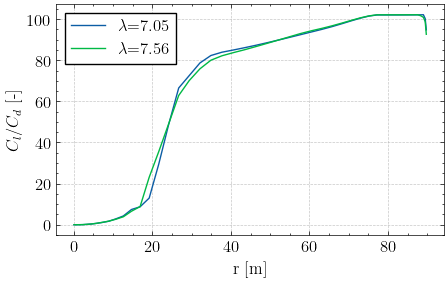

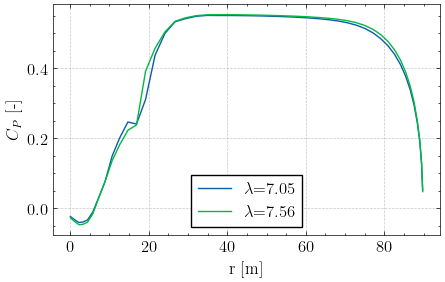

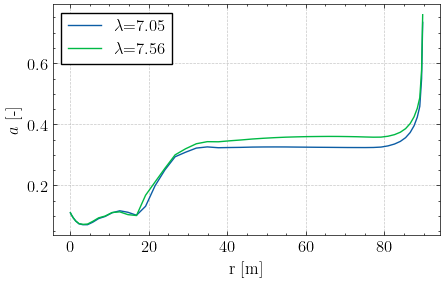

In [10]:
# This .ind file contains the data for the design pitch and TSR
BB_ind_file_path_2 = Path.cwd().parent.parent / 'res_hawc2s_backup' / 'BB_redesign_hawc2s_multitsr_u8014.ind'

# Load the data in a dictionary
ind_data_2 = load_ind(BB_ind_file_path_2)


plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], ind_data["Cl"]/ind_data["Cd"],label=r'$\lambda$=7.05')
plt.plot(ind_data_2["s_m"], ind_data_2["Cl"]/ind_data_2["Cd"],label=r'$\lambda$=7.56')
plt.ylabel(r"$C_l/C_d$ [-]")
plt.xlabel(r'r [m]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/Cl_Cd_r_hawc2s_vs_design_Jim_comparison.pdf')


plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], ind_data["CP"],label=r'$\lambda$=7.05')
plt.plot(ind_data_2["s_m"], ind_data_2["CP"],label=r'$\lambda$=7.56')
plt.ylabel(r"$C_P$ [-]")
plt.xlabel(r'r [m]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/CP_r_hawc2s_TSR_Jim_comparison.pdf')


plt.figure(figsize=(5, 3))
plt.plot(ind_data["s_m"], ind_data["a"],label=r'$\lambda$=7.05')
plt.plot(ind_data_2["s_m"], ind_data_2["a"],label=r'$\lambda$=7.56')
plt.ylabel(r"$a$ [-]")
plt.xlabel(r'r [m]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Plots/CP_r_hawc2s_TSR_Jim_comparison.pdf')